In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [2]:
# Loading and exploring the first 20 lines of data
all_data = pd.read_csv("all_data.csv")
print(all_data.head(20))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

In [3]:
# saw that there was a column named 'Life expectancy at birth (years)', so I decided to rename it
# in order to make this easier to work with
all_data = all_data.rename(columns={'Life expectancy at birth (years)' : 'Life_expectancy'})
print(all_data.head())

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


<function matplotlib.pyplot.clf()>

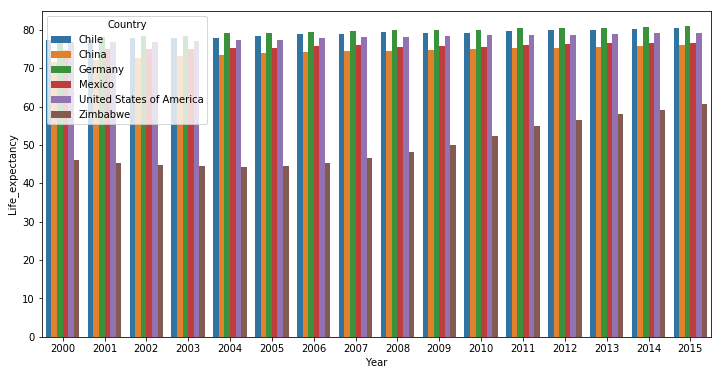

In [4]:
# This is just for myself to get a visual overview of the data. 
f, ax_country = plt.subplots(figsize=(12, 6))
ax_country = sns.barplot(data = all_data, x='Year', y='Life_expectancy', hue='Country')
plt.clf

In [5]:
# spliting database up by country. This is to make country based visulations and calculations easier

Chile = all_data[all_data.Country == 'Chile']
China = all_data[all_data.Country == 'China']
Germany = all_data[all_data.Country == 'Germany']
Mexico = all_data[all_data.Country == 'Mexico']
USA = all_data[all_data.Country == 'United States of America']
Zimbabwe = all_data[all_data.Country == 'Zimbabwe']

In [6]:
# so, to have a first look at life expectancy/year and GDP/year

country_list = [Chile, China, Germany, Mexico, USA, Zimbabwe]
labels_country = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
counter = 0
for i in country_list:
    plt.figure(figsize=(24,6))
    ax = plt.subplot(1, 2, 1)
    ax.set_title(labels_country[counter] + ': Life expectancy/year')
    ax.set_xlabel('Time (Years)')
    ax.set_ylabel('Life Expectancy')
    ax.plot(i['Year'], i['Life_expectancy'], marker='o', color='blue')
    
    ax2 = plt.subplot(1, 2, 2)
    ax2.set_title(labels_country[counter] + ': GDP/year')
    ax2.set_xlabel('Time (Years)')
    ax2.set_ylabel('Life Expectancy')
    ax2.plot(i['Year'], i['GDP'], marker='o', color='red')
    
    plt.savefig('Lineplot_life_expectancy_year_{}.png'.format(labels_country[counter]))
    plt.clf()
    counter += 1
    

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

In [7]:
# On the above graphs it looks like there COULD be a correlation, but I want to make shure
# First by making comparisons by country

counter = 0
for i in country_list:
    plt.figure(figsize=(24,6))
    ax = plt.subplot(1, 2, 1)
    ax.set_title('Heatmap, life expectancy/gdp: ' + labels_country[counter])
    ax.set_xlabel('Life Expectancy')
    ax.set_ylabel('GDP')
    ax = plt.hist2d(i['Life_expectancy'], i['GDP'])
    plt.colorbar()
    
    ax2 = plt.subplot(1, 2, 2)
    ax2.set_title('Scatterplot exploring relation with life expectancy/GDP in {}'.format(labels_country[counter]))
    ax2.set_xlabel('Life Expectancy')
    ax2.set_ylabel('GDP')
    ax2 = plt.scatter(x = 'Life_expectancy', y = 'GDP', data = i)
    
    pic_name = 'Heat_scatter_correlation_life_gdp_{}.png'.format(labels_country[counter])
    plt.savefig(pic_name)
    counter += 1
    plt.clf()

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

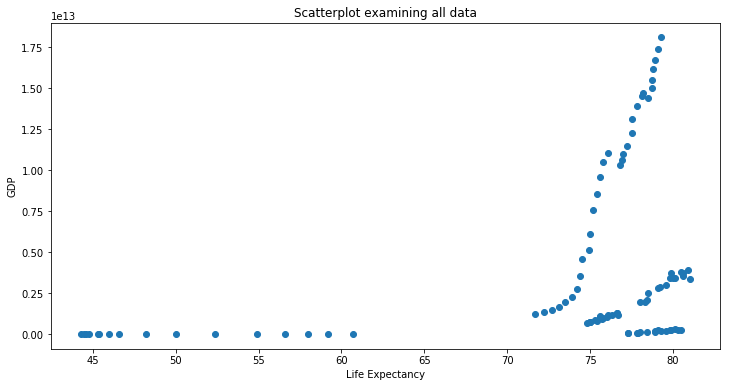

In [8]:
# We can see on the above visulations that there seems to be a strong positive correlation.
# lets look at all data if we can see the bigger picture

f, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Scatterplot examining all data')
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('GDP')
ax = plt.scatter(x = 'Life_expectancy', y='GDP', data=all_data)

plt.savefig('scatterplot_big_picture')

In [9]:
# on the above plot we see that gdp values can range between aprox 0.2 to 1.75 and still maintain a life expectancy
# of 80 years. This means (looking att the graphs by country above) that an increase in gdp is a result from
# life conditions improving due to other means. 

# it could be that when people have better conditions they worry less about survival. and are less inclined to hoard money.
# And when they spend more, gdp increases.

# And since better conditions means less worry of survival (food), and people being more likely to spend on other things.
# Then more non-food related stores would get increased revenue.

# Since non-food related stores would get increased revenue
# This could be trackable by exploring the increase in revenue from clothing stores, and other non-food related purchases.


# But for the sake of being shure, im going to explore correlations in numbers

correlation, p = pearsonr(all_data['Life_expectancy'], all_data['GDP'])
print("Correlation between life expectancy and gdp in all countries is: ", correlation, '\n\n')

counter = 0

for i in country_list:
    correlation, p = pearsonr(i['Life_expectancy'], i['GDP'])
    
    print(labels_country[counter] + " the correlation between Life Expectancy and GDP is: ", correlation, "\n")
    
    counter += 1

Correlation between life expectancy and gdp in all countries is:  0.34320674844915605 


Chile the correlation between Life Expectancy and GDP is:  0.9498766659254417 

China the correlation between Life Expectancy and GDP is:  0.9085255408648357 

Germany the correlation between Life Expectancy and GDP is:  0.932698898256127 

Mexico the correlation between Life Expectancy and GDP is:  0.9322377167847082 

USA the correlation between Life Expectancy and GDP is:  0.9817092382430257 

Zimbabwe the correlation between Life Expectancy and GDP is:  0.9661998955858777 



In [10]:
# As we can see above. If we take this on a country by country basis, it will look like there is a strong
# linear correlation between gdp and life expectancy.

# But when we look at the bigger picture it is quite clear that gdp and life expectancy is not correlated
# Therefor life expectancy is most likely correlated with other factors that can increase gdp